<img src="logo.png" width="190" height="60">
<center>
    <b>Seminario</b><br>
    <b>Author:  Juan Isaula</b>
<br><br>
<b>Resultado Preliminar:</b>
<h1>Neural Prophet</h1>
</center>
<i>Creado:     2022-Enero-31

Cargamos los paquetes a utilizar

In [171]:
import pandas as pd
from fbprophet import Prophet
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error

#Plotting
import matplotlib.pyplot as plt

# Setting
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16,8)

In [172]:
%config InlineBackend.figure_format = 'retina'

Cargamos el conjunto de datos (S&P 500)

In [173]:
df = pd.read_csv('Datos_de_prueba.csv')

print(f'La data contiene {len(df)} observaciones.')
df

La data contiene 7322 observaciones.


,ds,y
0,2008-04-11,1357.98
1,2008-04-10,1367.24
2,2008-04-09,1368.39
3,2008-04-08,1370.16
4,2008-04-07,1386.74
...,...,...
7317,1979-04-18,101.70
7318,1979-04-17,101.24
7319,1979-04-16,101.12
7320,1979-04-12,102.00


Creamos nuestro modelo NEURAL PROPHET

In [174]:
from neuralprophet import NeuralProphet


#prcp_data = data.rename(columns={'Fecha':'ds','Precio':'y'})[['ds','y']]
model = NeuralProphet() # seasonality_mode='multiplicative'
metrics = model.fit(df,freq='D',epochs=200)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
 89%|████████▊ | 260/293 [00:02<00:00, 90.11it/s] 
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.29E-02, min: 5.24E-01
INFO:NP.utils_torch:lr-range-test results: steep: 3.29E-02, min: 5.24E-01
 91%|█████████ | 266/293 [00:02<00:00, 129.36it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.29E-02, min: 5.62E-01
INFO:NP.utils_torch:lr-range-test results: steep: 3.29E-02, min: 5.62E-01
 89%|████████▉ | 262/293 [00:02<00:00, 112.24it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.29E-02, min: 4.55E-01
INFO:NP.utils_torch:lr-range-test results: steep: 3.29E-02, min: 

Realizamos los pronósticos y nuestro plot del pronóstico.

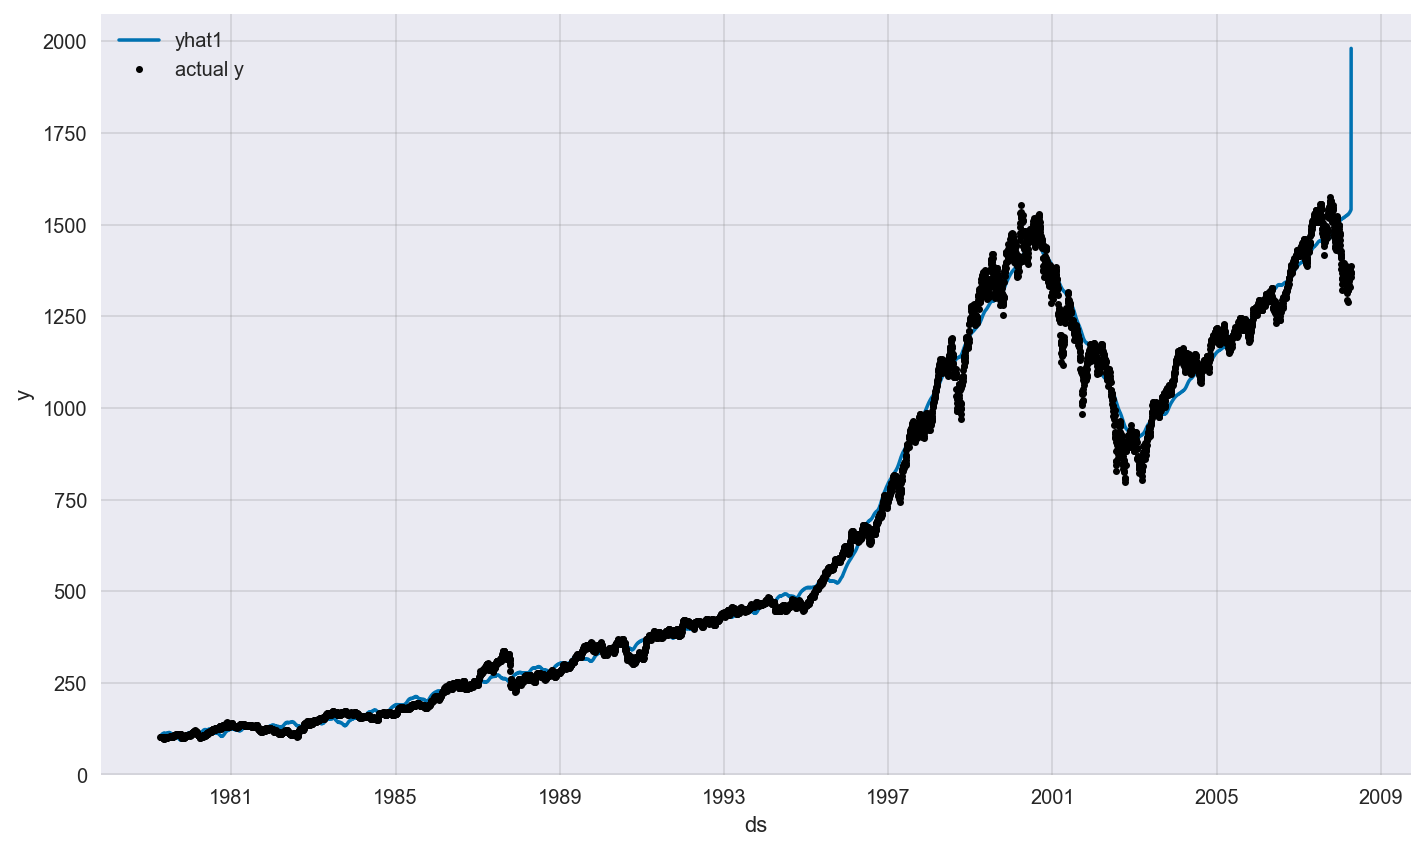

In [175]:
future = model.make_future_dataframe(df,n_historic_predictions=len(df))
forcast_3 = model.predict(future)
forcasts_plot = model.plot(forcast_3)

Agregamos una nueva columna a nuestro dataframe(df) con los pronosticos encontrados previamente con nuestro modelo Neural Prophet.

In [176]:

df['borrar'] = forcast_3.loc[:,'yhat1'] # escribimos las pronosticos hechos por NP en el datafame (df)
coln = df.borrar.values[::-1]                      # invertimos el orden de la columna
df['NeuralProphet'] = coln                         # escribimos la columna en el datadrame con los valores invertidos
df.drop(['borrar'],axis='columns',inplace=True) # borramos del dataframe la columna borrar
df

,ds,y,NeuralProphet
0,2008-04-11,1357.98,1540.735840
1,2008-04-10,1367.24,1540.149902
2,2008-04-09,1368.39,1539.754150
3,2008-04-08,1370.16,1538.879395
4,2008-04-07,1386.74,1537.864014
...,...,...,...
7317,1979-04-18,101.70,107.521545
7318,1979-04-17,101.24,106.920143
7319,1979-04-16,101.12,106.165817
7320,1979-04-12,102.00,104.953880


In [178]:
df.ds = pd.to_datetime(df.ds)
df.set_index('ds',inplace=True)
df

,y,NeuralProphet
ds,,
2008-04-11,1357.98,1540.735840
2008-04-10,1367.24,1540.149902
2008-04-09,1368.39,1539.754150
2008-04-08,1370.16,1538.879395
2008-04-07,1386.74,1537.864014
...,...,...
1979-04-18,101.70,107.521545
1979-04-17,101.24,106.920143
1979-04-16,101.12,106.165817


Graficamos nuestro pronostico con la serie original y observamos que tan bien se ajusta nuestro pronostico a los datos. 

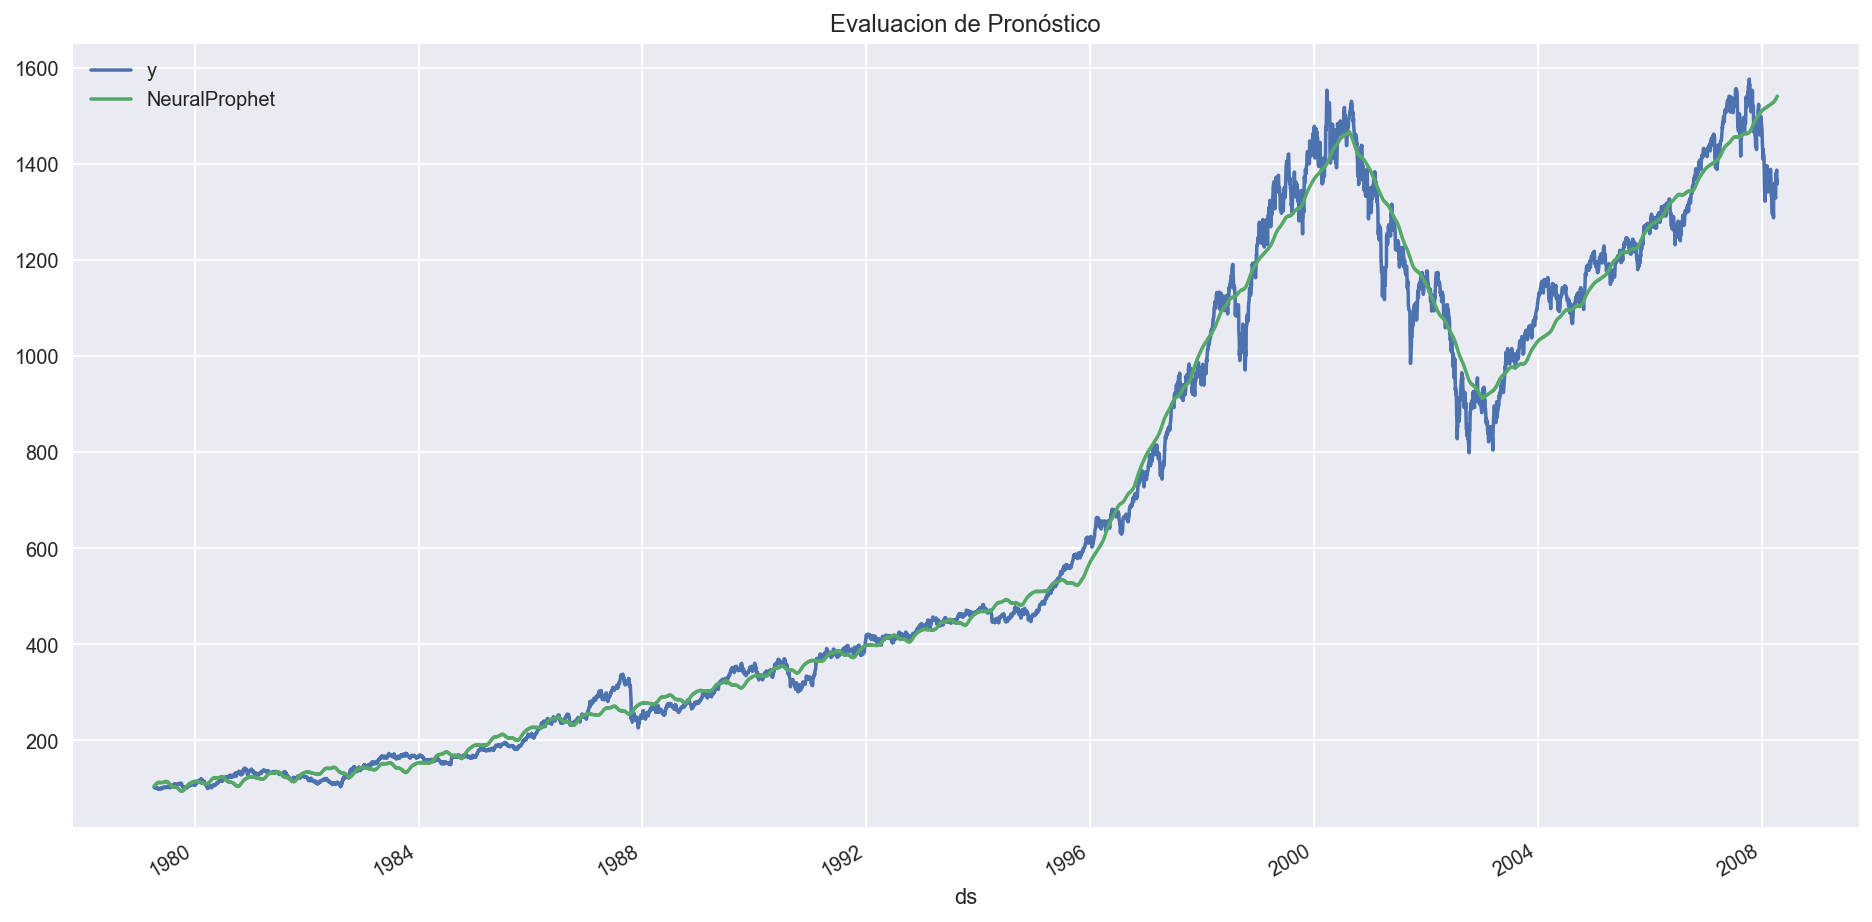

In [180]:
df.plot(title='Evaluacion de Pronóstico');